In [1]:
# Dependencies
import json
import requests as req
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from citipy import citipy

In [2]:
# Latitude and longitude zones based on geographic coordinate system (in intervals of 10)
lat_zone = np.arange(-90, 90, 10)
lon_zone = np.arange(-180, 180, 10)

# Create dataframe for storing data
cities_df = pd.DataFrame()

# Make columns in dataframe
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["City"] = ""
cities_df["Country"] = ""

# Create 'for' loop to get latitude and longitude values
for coord_lat in lat_zone:
    
    for coord_lon in lon_zone:
        # Get list of latitude and longitude values (0.01 for value to 2 decimal places)
        lat_values = list(np.arange(coord_lat, coord_lat + 15, 0.01))
        lon_values = list(np.arange(coord_lon, coord_lon + 15, 0.01))
        
        # Random latitude and longitude values 
        random_lats = random.sample(lat_values, 50)
        random_lons = random.sample(lon_values, 50)
        
        # Sample of latitude and longitude values
        lat_samples = [coord_lat + lat for lat in random_lats]
        lon_samples = [coord_lon + lon for lon in random_lons]
        
        # Store values in dataframe created
        cities_df = cities_df.append(pd.DataFrame.from_dict({
            "Latitude": lat_samples, 
            "Longitude": lon_samples}))

cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,City,Country,Latitude,Longitude
0,NaN,NaN,-174.27,-347.40
1,NaN,NaN,-167.26,-351.92
2,NaN,NaN,-168.55,-354.87
3,NaN,NaN,-175.38,-348.56
4,NaN,NaN,-165.21,-352.03


In [3]:
# Use 'for' loop to locate the neareast city based on latitude and longitude stored in dataframe
for column, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(column, "City", city.city_name)
    cities_df.set_value(column, "Country", city.country_code)

# Remove Latitude and Longitude columns to get city names and countries only
new_cities_df = cities_df.drop(["Latitude", "Longitude"], axis=1)

# Remove duplicate cities and keep unique cities and countries only
new_cities_df = new_cities_df.drop_duplicates()
new_cities_df.head()

,City,Country
0,vaini,to
451,mataura,pf
500,punta arenas,cl
521,ushuaia,ar
900,bredasdorp,za


In [4]:
# Choose 500 random cities based on longitude and latitude
random_cities_df = new_cities_df.sample(500)

# Reset index
random_cities_df = random_cities_df.reset_index(drop=True)
random_cities_df.head()

,City,Country
0,kyra,ru
1,jarjis,tn
2,inverell,au
3,glens falls,us
4,elko,us


In [5]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather"

params = {"appid": "2ec88724f3fad131ccffe1dfb2efab45",
          "units": "metric"}

# Use 'for' loop to retrieve weather info by rows in dataframe
for column, row in random_cities_df.iterrows():
    
    # Reference rows for 'q' param
    params["q"] = f'{row["City"]}, {row["Country"]}'
    
    # Get and print links for each city
    print(f'Weather information for {params["q"]}')
    weather_response = req.get(url, params)
    print(weather_response.url)
    weather_response  = weather_response.json()
    
    # Get weather data and input into dataframe
    random_cities_df.set_value(column, "Latitude", weather_response.get("coord", {}).get("lat"))
    random_cities_df.set_value(column, "Longitude", weather_response.get("coord", {}).get("lon"))
    random_cities_df.set_value(column, "Temperature", weather_response.get("main", {}).get("temp_max"))
    random_cities_df.set_value(column, "Wind Speed", weather_response.get("wind", {}).get("speed"))
    random_cities_df.set_value(column, "Humidity", weather_response.get("main", {}).get("humidity"))
    random_cities_df.set_value(column, "Cloudiness", weather_response.get("clouds", {}).get("all"))

Weather information for kyra, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kyra%2C+ru
Weather information for jarjis, tn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=jarjis%2C+tn
Weather information for inverell, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=inverell%2C+au
Weather information for glens falls, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=glens+falls%2C+us
Weather information for elko, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=elko%2C+us
Weather information for huazolotitlan, mx
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=huazolotitlan%2C+mx
Weather information for tarata, pe
http://api.openweathermap.org/data/2.5/weather?appi

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pokhara%2C+np
Weather information for sumbe, ao
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sumbe%2C+ao
Weather information for kilindoni, tz
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kilindoni%2C+tz
Weather information for manokwari, id
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=manokwari%2C+id
Weather information for kramat, id
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kramat%2C+id
Weather information for amapa, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=amapa%2C+br
Weather information for edd, er
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=thompson%2C+ca
Weather information for muli, mv
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=muli%2C+mv
Weather information for luebo, cd
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=luebo%2C+cd
Weather information for talcahuano, cl
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=talcahuano%2C+cl
Weather information for nizhniy kuranakh, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=nizhniy+kuranakh%2C+ru
Weather information for belaya gora, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=belaya+gora%2C+ru
Weather information for alghero, it
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131cc

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=keokuk%2C+us
Weather information for cajamarca, pe
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=cajamarca%2C+pe
Weather information for usogorsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=usogorsk%2C+ru
Weather information for san joaquin, bo
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=san+joaquin%2C+bo
Weather information for luau, ao
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=luau%2C+ao
Weather information for dakar, sn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=dakar%2C+sn
Weather information for tiznit, ma
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=jutai%2C+br
Weather information for sassandra, ci
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sassandra%2C+ci
Weather information for koslan, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=koslan%2C+ru
Weather information for khatanga, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=khatanga%2C+ru
Weather information for qaqortoq, gl
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=qaqortoq%2C+gl
Weather information for sai buri, th
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sai+buri%2C+th
Weather information for constitucion, mx
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tateyama%2C+jp
Weather information for tukrah, ly
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tukrah%2C+ly
Weather information for tabuleiro do norte, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tabuleiro+do+norte%2C+br
Weather information for guasdualito, ve
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=guasdualito%2C+ve
Weather information for jawhar, so
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=jawhar%2C+so
Weather information for tula, mx
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tula%2C+mx
Weather information for yashalta, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccf

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=vila+franca+do+campo%2C+pt
Weather information for ambilobe, mg
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ambilobe%2C+mg
Weather information for tkvarcheli, ge
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tkvarcheli%2C+ge
Weather information for knysna, za
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=knysna%2C+za
Weather information for kinablangan, ph
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kinablangan%2C+ph
Weather information for ust-koksa, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ust-koksa%2C+ru
Weather information for kapit, my
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fa

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kalemie%2C+cd
Weather information for salta, ar
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=salta%2C+ar
Weather information for hanzhong, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=hanzhong%2C+cn
Weather information for zima, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=zima%2C+ru
Weather information for sao miguel do araguaia, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sao+miguel+do+araguaia%2C+br
Weather information for saint-augustin, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=saint-augustin%2C+ca
Weather information for bardiyah, ly
http://api.openweathermap.org/data/2.5/weather?appid=2ec8

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=miandrivazo%2C+mg
Weather information for umzimvubu, za
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=umzimvubu%2C+za
Weather information for ambovombe, mg
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ambovombe%2C+mg
Weather information for wasilla, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=wasilla%2C+us
Weather information for cheremukhovo, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=cheremukhovo%2C+ru
Weather information for innisfail, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=innisfail%2C+au
Weather information for santa margherita ligure, it
http://api.openweathermap.org/data/2.5/weather?appid

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=hithadhoo%2C+mv
Weather information for trakai, lt
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=trakai%2C+lt
Weather information for terrace bay, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=terrace+bay%2C+ca
Weather information for ouadda, cf
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ouadda%2C+cf
Weather information for mabaruma, gy
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mabaruma%2C+gy
Weather information for olden, no
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=olden%2C+no
Weather information for russell, nz
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&unit

In [7]:
# Display dataframe with all info
random_cities_df

# Remove cities with no data available
new_random_cities_df = random_cities_df.dropna()
new_random_cities_df.head()

,City,Country,Latitude,Longitude,Temperature,Wind Speed,Humidity,Cloudiness
0,kyra,ru,49.58,111.98,-14.68,4.21,44.0,20.0
2,inverell,au,-29.78,151.12,18.48,1.86,83.0,56.0
3,glens falls,us,43.31,-73.64,-3.00,3.10,85.0,1.0
4,elko,us,40.83,-115.76,-3.00,1.16,73.0,1.0
6,tarata,pe,-17.47,-70.03,3.25,1.11,79.0,20.0


In [8]:
# Save dataframe to csv file
new_random_cities_df.to_csv("WeatherInfoByWorldCities.csv")

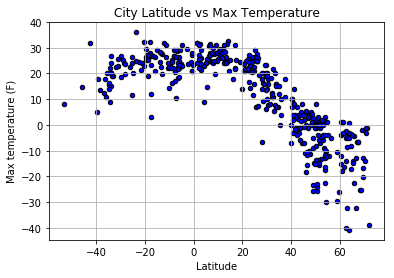

In [17]:
# Plot Temperature (F) vs. Latitude
temp_vs_lat = new_random_cities_df.plot(kind="scatter",
                                        x="Latitude",
                                        y="Temperature",
                                        color="blue",
                                        edgecolor="black",
                                        grid=True)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.savefig("LatVsTemp.png")
plt.show()

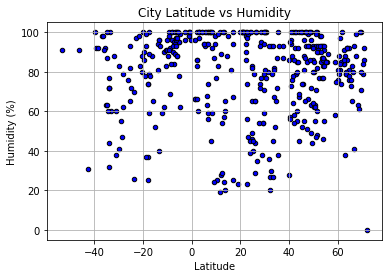

In [18]:
# Plot Humidity (%) vs. Latitude
humid_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Humidity",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatVsHumidity.png")
plt.show()

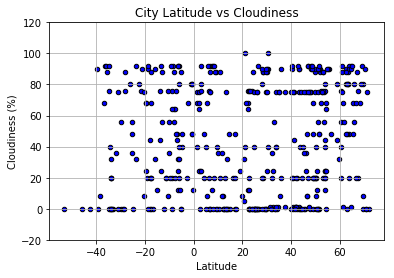

In [21]:
# Plot Cloudiness (%) vs. Latitude
cloud_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Cloudiness",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20, 120)
plt.savefig("LatVsCloudiness.png")
plt.show()

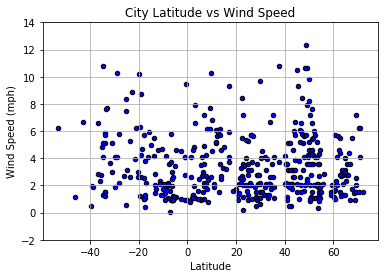

In [23]:
# Plot Wind Speed (mph) vs. Latitude
windspeed_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Wind Speed",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 14)
plt.savefig("LatVsWindSpeed.png")
plt.show()

Analysis
1. On the first graph (City Latitude vs Max Temperature), the latitude at 0 is equivalent to the equator. We can see that at 0, the max temperatures are at the highest. Anything going further from 0, the temperatures begin decreasing.
2. On the other graphs, it doesn't seem like there is any correlation between latitude and the other chosen variables. Cloudiness, humidity, and wind speed varies across all latitudes.
3. The only variable that is dependent on latitude is temperature.